##### COCO.json読み込み

In [1]:
import os
import json

rootpath="../data/raw"

json_path = os.path.join(rootpath, "COCO.json")
with open(json_path) as data_file:
    data_this = json.load(data_file)
    data_json = data_this["root"]
num_samples = len(data_json)
print(num_samples)

126395


In [2]:
train_indexes = []
val_indexes = []
for count in range(num_samples):
    if data_json[count]["isValidation"] != 0.:
        val_indexes.append(count)
    else:
        train_indexes.append(count)
print(len(train_indexes))
print(len(val_indexes))

121522
4873


In [3]:
train_img_list = list()
val_img_list = list()

for idx in train_indexes:
    img_path = os.path.join(rootpath, data_json[idx]["img_paths"])
    train_img_list.append(img_path)

for idx in val_indexes:
    img_path = os.path.join(rootpath, data_json[idx]["img_paths"])
    val_img_list.append(img_path)

print(train_img_list[0])
print(val_img_list[0])

../data/raw\train2014/COCO_train2014_000000000036.jpg
../data/raw\val2014/COCO_val2014_000000000136.jpg


In [4]:
train_meta_list = list()
val_meta_list = list()

for idx in train_indexes:
    train_meta_list.append(data_json[idx])

for idx in val_indexes:
    val_meta_list.append(data_json[idx])

print(train_meta_list[0])
print(val_meta_list[0])

{'dataset': 'COCO', 'isValidation': 0.0, 'img_paths': 'train2014/COCO_train2014_000000000036.jpg', 'img_width': 481.0, 'img_height': 640.0, 'objpos': [322.885, 395.485], 'image_id': 36.0, 'bbox': [167.58, 162.89, 310.61, 465.19], 'segment_area': 86145.297, 'num_keypoints': 13.0, 'joint_self': [[250.0, 244.0, 1.0], [265.0, 223.0, 1.0], [235.0, 235.0, 1.0], [309.0, 227.0, 1.0], [235.0, 253.0, 1.0], [355.0, 337.0, 1.0], [215.0, 342.0, 1.0], [407.0, 494.0, 1.0], [213.0, 520.0, 1.0], [445.0, 617.0, 1.0], [244.0, 447.0, 1.0], [338.0, 603.0, 1.0], [267.0, 608.0, 1.0], [0.0, 0.0, 2.0], [0.0, 0.0, 2.0], [0.0, 0.0, 2.0], [0.0, 0.0, 2.0]], 'scale_provided': 1.264, 'joint_others': [], 'annolist_index': 1.0, 'people_index': 1.0, 'numOtherPeople': 0.0, 'scale_provided_other': {'_ArrayType_': 'double', '_ArraySize_': [0, 0], '_ArrayData_': None}, 'objpos_other': {'_ArrayType_': 'double', '_ArraySize_': [0, 0], '_ArrayData_': None}, 'bbox_other': {'_ArrayType_': 'double', '_ArraySize_': [0, 0], '_Arra

##### オーギュメンテーション

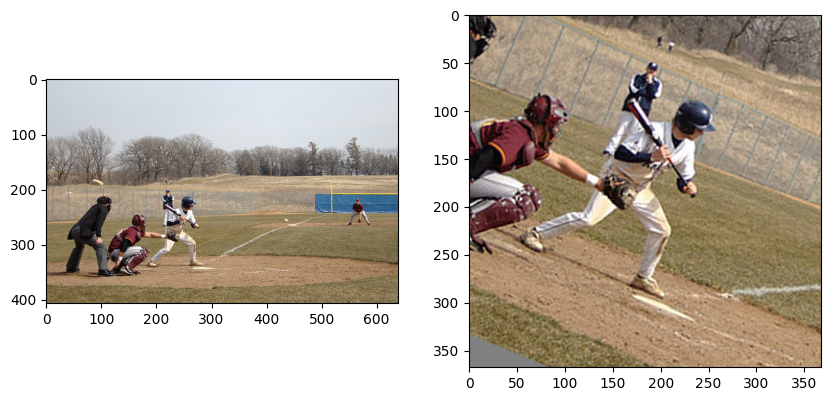

In [21]:
import cv2
import matplotlib.pyplot as plt
from data_augumentation import Compose, get_anno, add_neck, aug_scale, aug_rotate, aug_croppad, aug_flip, remove_illegal_joint, Normalize_Tensor, no_Normalize_Tensor

class DataTransform():
    def __init__(self):
        self.data_transform = {
            "train": Compose([
                get_anno(),
                add_neck(),
                aug_scale(),
                aug_rotate(),
                aug_croppad(),
                aug_flip(),
                remove_illegal_joint(),
                # no_Normalize_Tensor()
            ]),
            "val": Compose([

            ])
        }

    def __call__(self, phase, meta_data, img, mask_miss):
        meta_data, img, mask_miss = self.data_transform[phase](meta_data, img, mask_miss)
        return meta_data, img, mask_miss

index = 24
img_org = cv2.imread(val_img_list[index])
# mask_miss = cv2.imread(val_mask_list[index])
meta_data = val_meta_list[index]

transform = DataTransform()
meta_data, img, _ = transform("train", meta_data, img_org, None)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))